
# <span style="color:rgb(213,80,0)">Setup</span>

\- Create repository folders, explain what these folders are for. DAC, RDC, DSC. \- Store data in DAC \- Create matlab folder \- create a tmp.m file (temporary, at the end of the session this should be renamed


Context experiment here

## Initialization

when running the script, choose change folder


In [1]:
close all;
clear;

% running the script will prompt the message: tmp.m cannot be found on
% path. It will ask to do something. Choose: change folder.

## Load Data

Start with absolute path, fname = '/Users/marcw/Library/CloudStorage/Dropbox/Onderwijs/course \- Analysis Workshop/DAC/NH\-0115\-22\-10\-07\-data.mat'; % absolute and then explain relative path. Now the folder structure and the change folder make sense: everyone with the same folder structure can run this script, and it will work! Not so for absolute paths or when you add this tmp.m folder to Matlab's path.


In [2]:
fname = fullfile('..','datasets','tactileperception','DAC','tactile_data_one_participant.xlsx'); % file name, relative path
T = readtable(fname);

% Explain the experiment, explain data (rows individual trials, columns
% different parameters). Note: this is tidydata (not raw).
T(1,:)



## Graphics

response orientation vs tactile orientation



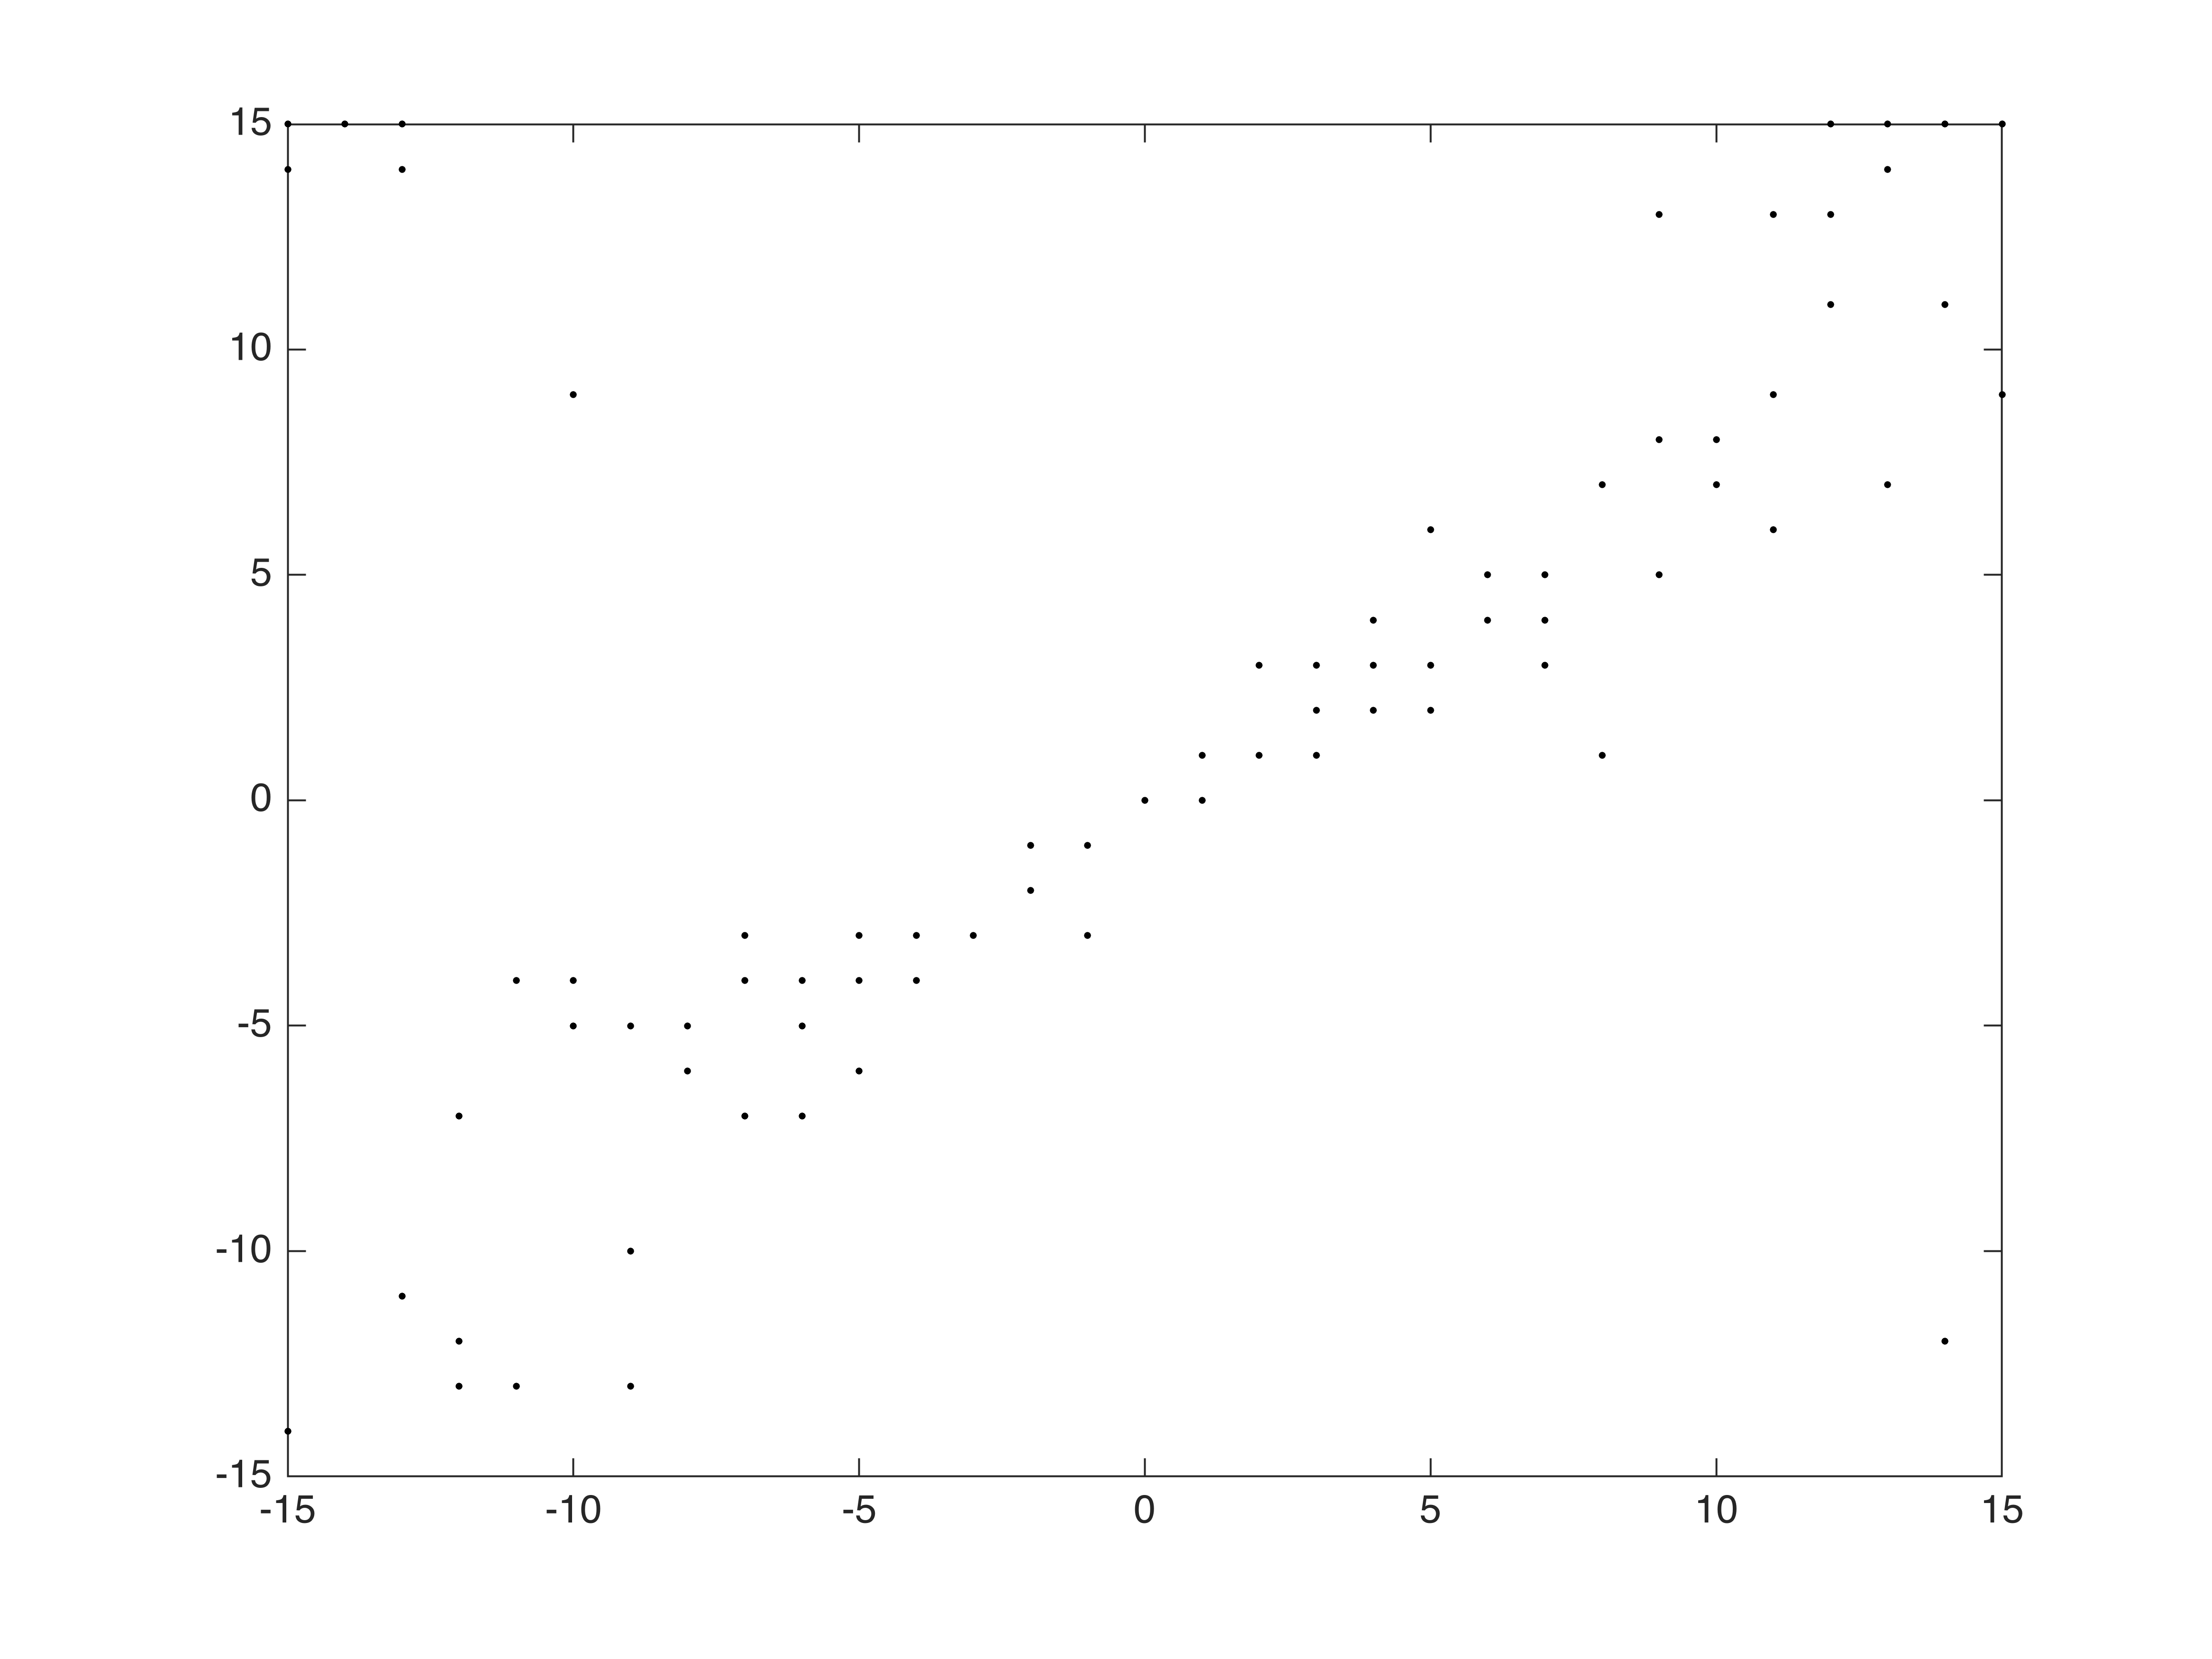

In [3]:
y = T.response; % response orientation
x = T.stimulus; % stimulus  orientation

% Build this up: first just plot, and discuss what would make this figure
% better
figure(1);
clf;
plot(x,y,'k.');


## Exercise 1.1

We can improve the layout of this figure, by making the axis square, labeling the axes, etc. You can find help by typing help function in the command window.


In [4]:
help plot

  AMT - Model-specific plot functions
 
 
   Model-related plot functions
      plot_audspecgram                       - plots an auditory spectrogram
      plot_baumgartner2013                   - plot probabilistic prediction matrixes
      plot_baumgartner2014                   - plot probabilistic prediction matrixes
      plot_baumgartner2014_likelistat        - Likelihood statistics in the model
      plot_bruce2018                         - plot the output of the bruce2018 model
      plot_joergensen2011                    - Plot output of Joergensen2011 model
      plot_joergensen2013                    - Plot output of Joergensen2013 model
      plot_kelvasa2015                       - Plot the output of the Kelvasa2015 model
      plot_langendijk2002                    - Plot the pdf-matrices with grey colormap
      plot_langendijk2002_likelihood         - Plot the likelihood statistics
      plot_llado2022                         - Plot neural network localization estimates


## Graphics

Here are some pointers



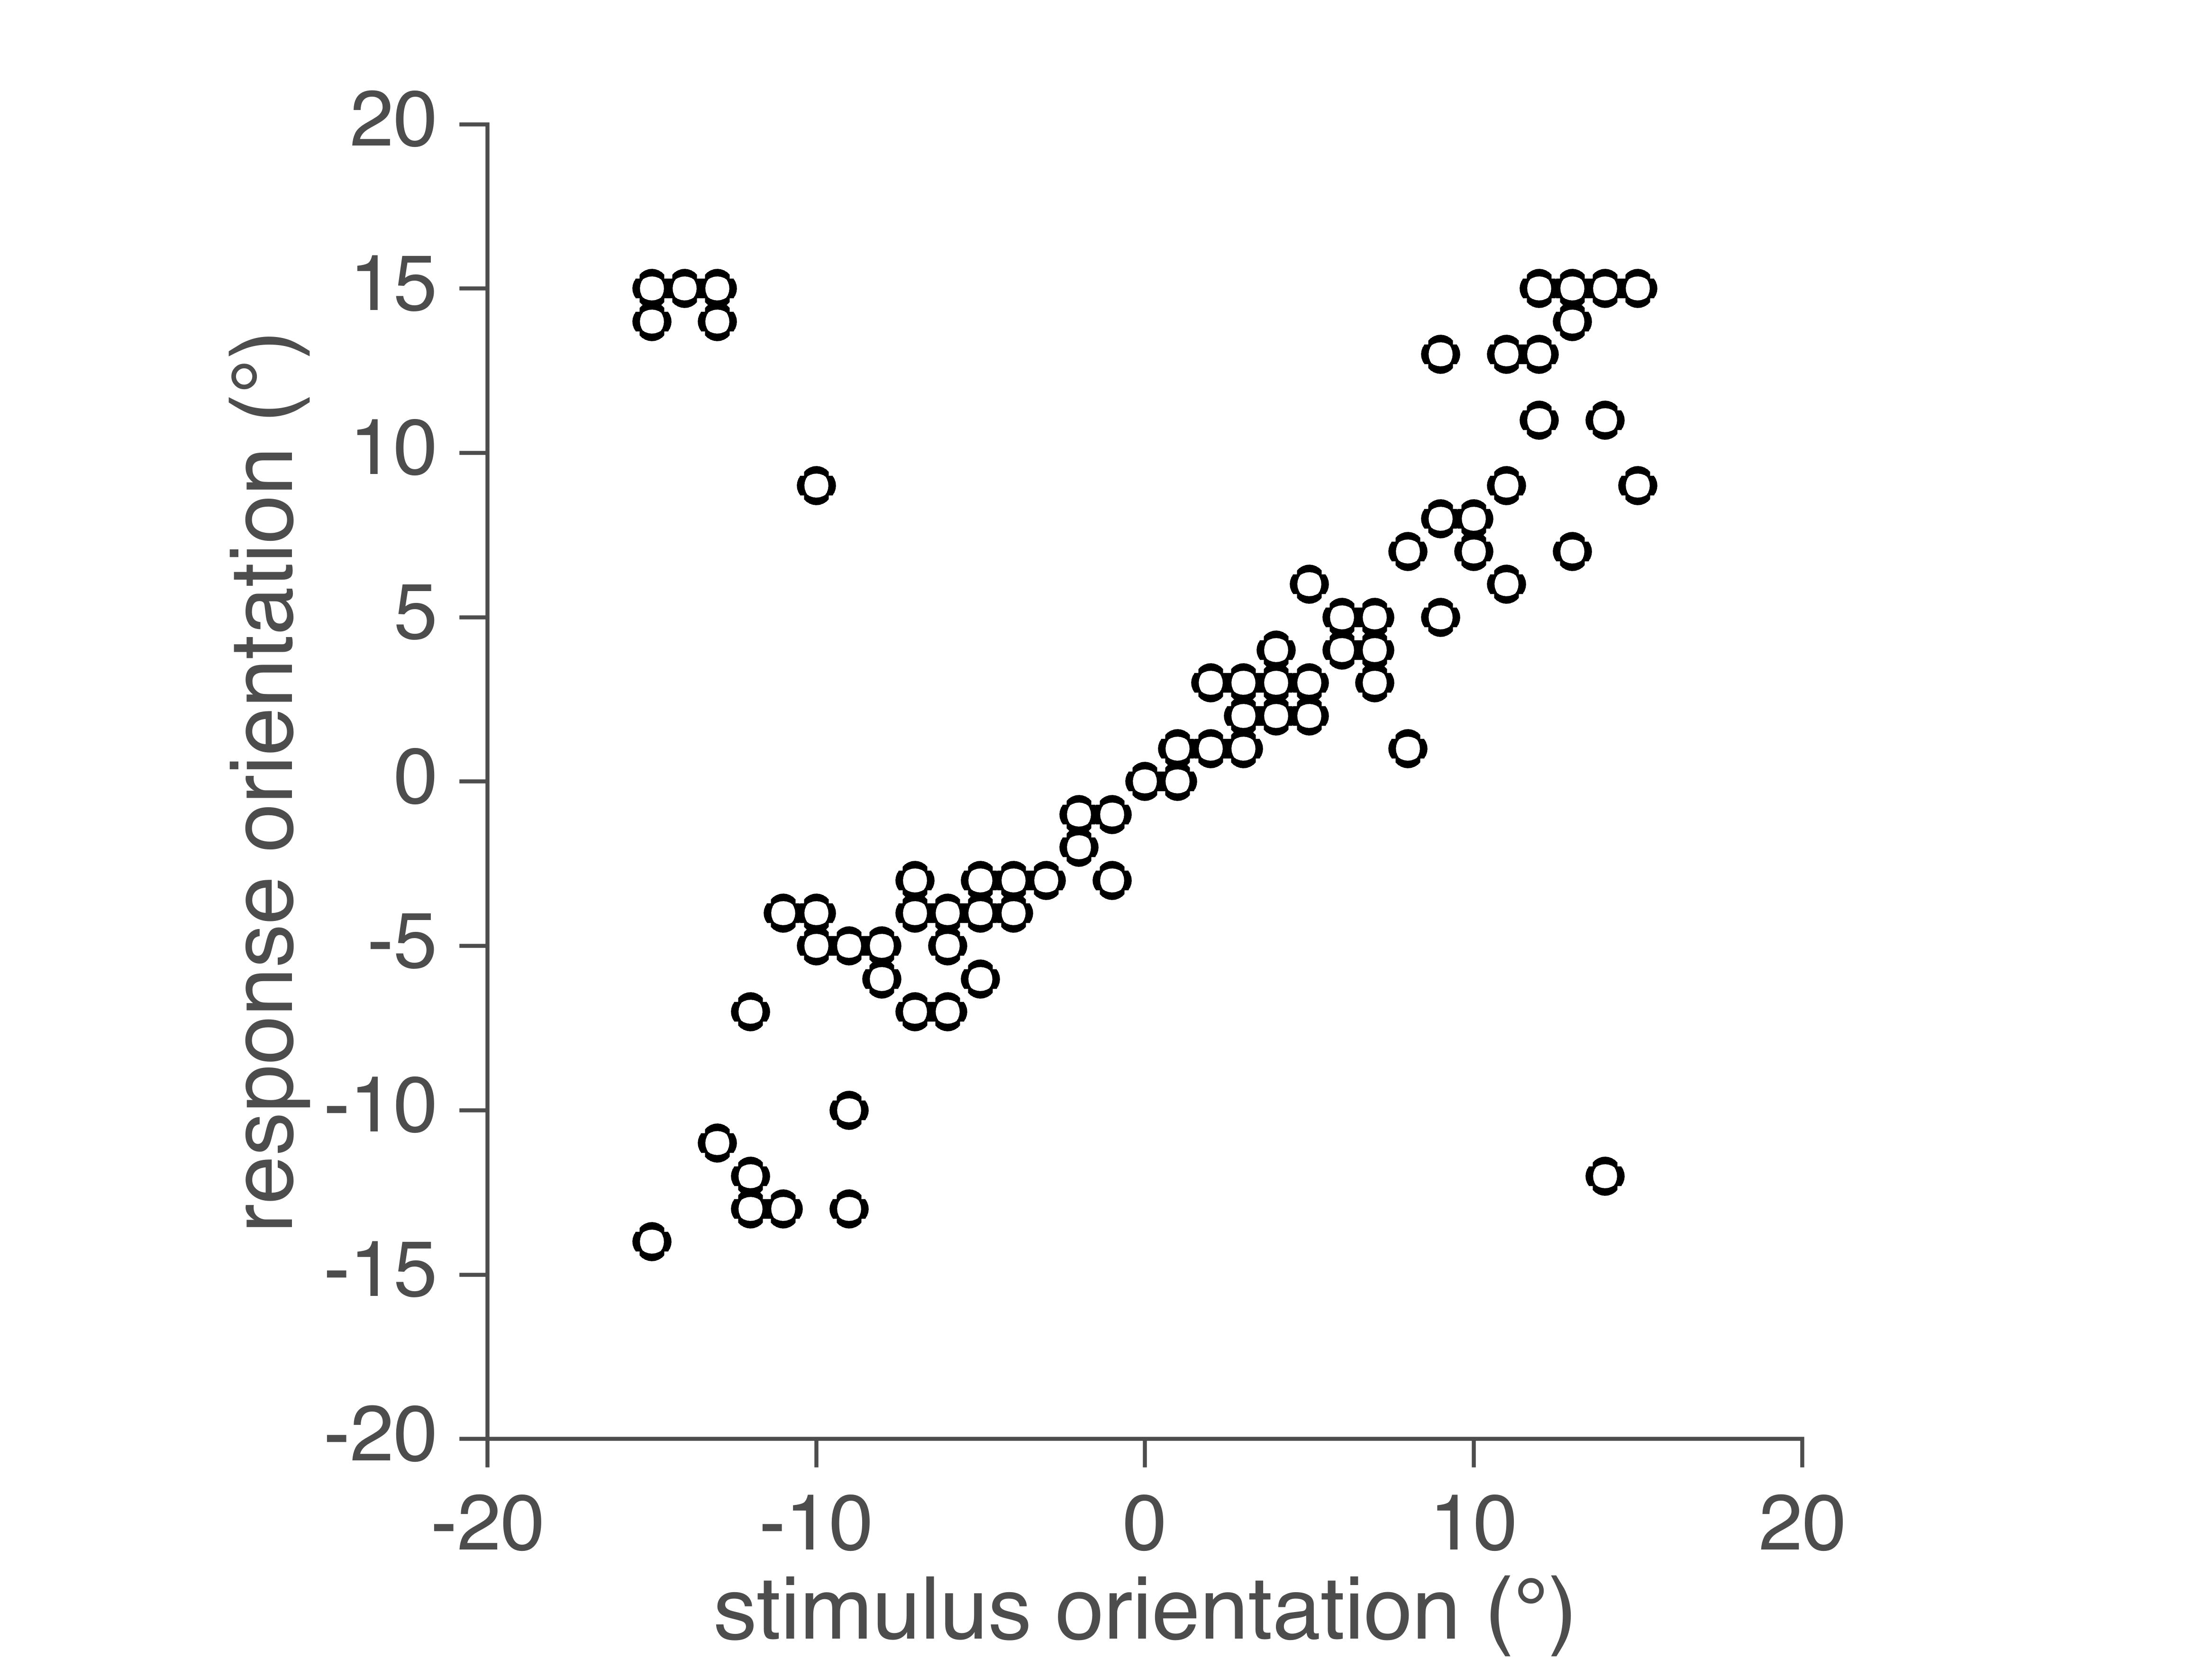

In [5]:
y = T.response; % response orientation
x = T.stimulus; % stimulus  orientation

% Build this up: first just plot, and discuss what would make this figure
% better
figure(1);
clf; % clear figure
plot(x,y,'ko','MarkerFaceColor','w','Markersize',8,'LineWidth',2);
xlabel(['stimulus orientation (' char(176) ')']);
ylabel(['response orientation (' char(176) ')']);
% set(gca,'FontSize',20);
% set(gca,'Xtick',-90:30:90,'Ytick',-90:30:90);
xlim([-20 20]);
ylim([-20 20]);
% axis square;
% box off;
nicegraph; % does some nice graphing stuff, like axis square, box off, etc


## Looking at data set

If we look at the data set, we see something weird.


The data is not in angles (deg), but in clock minutes. So we first change this.



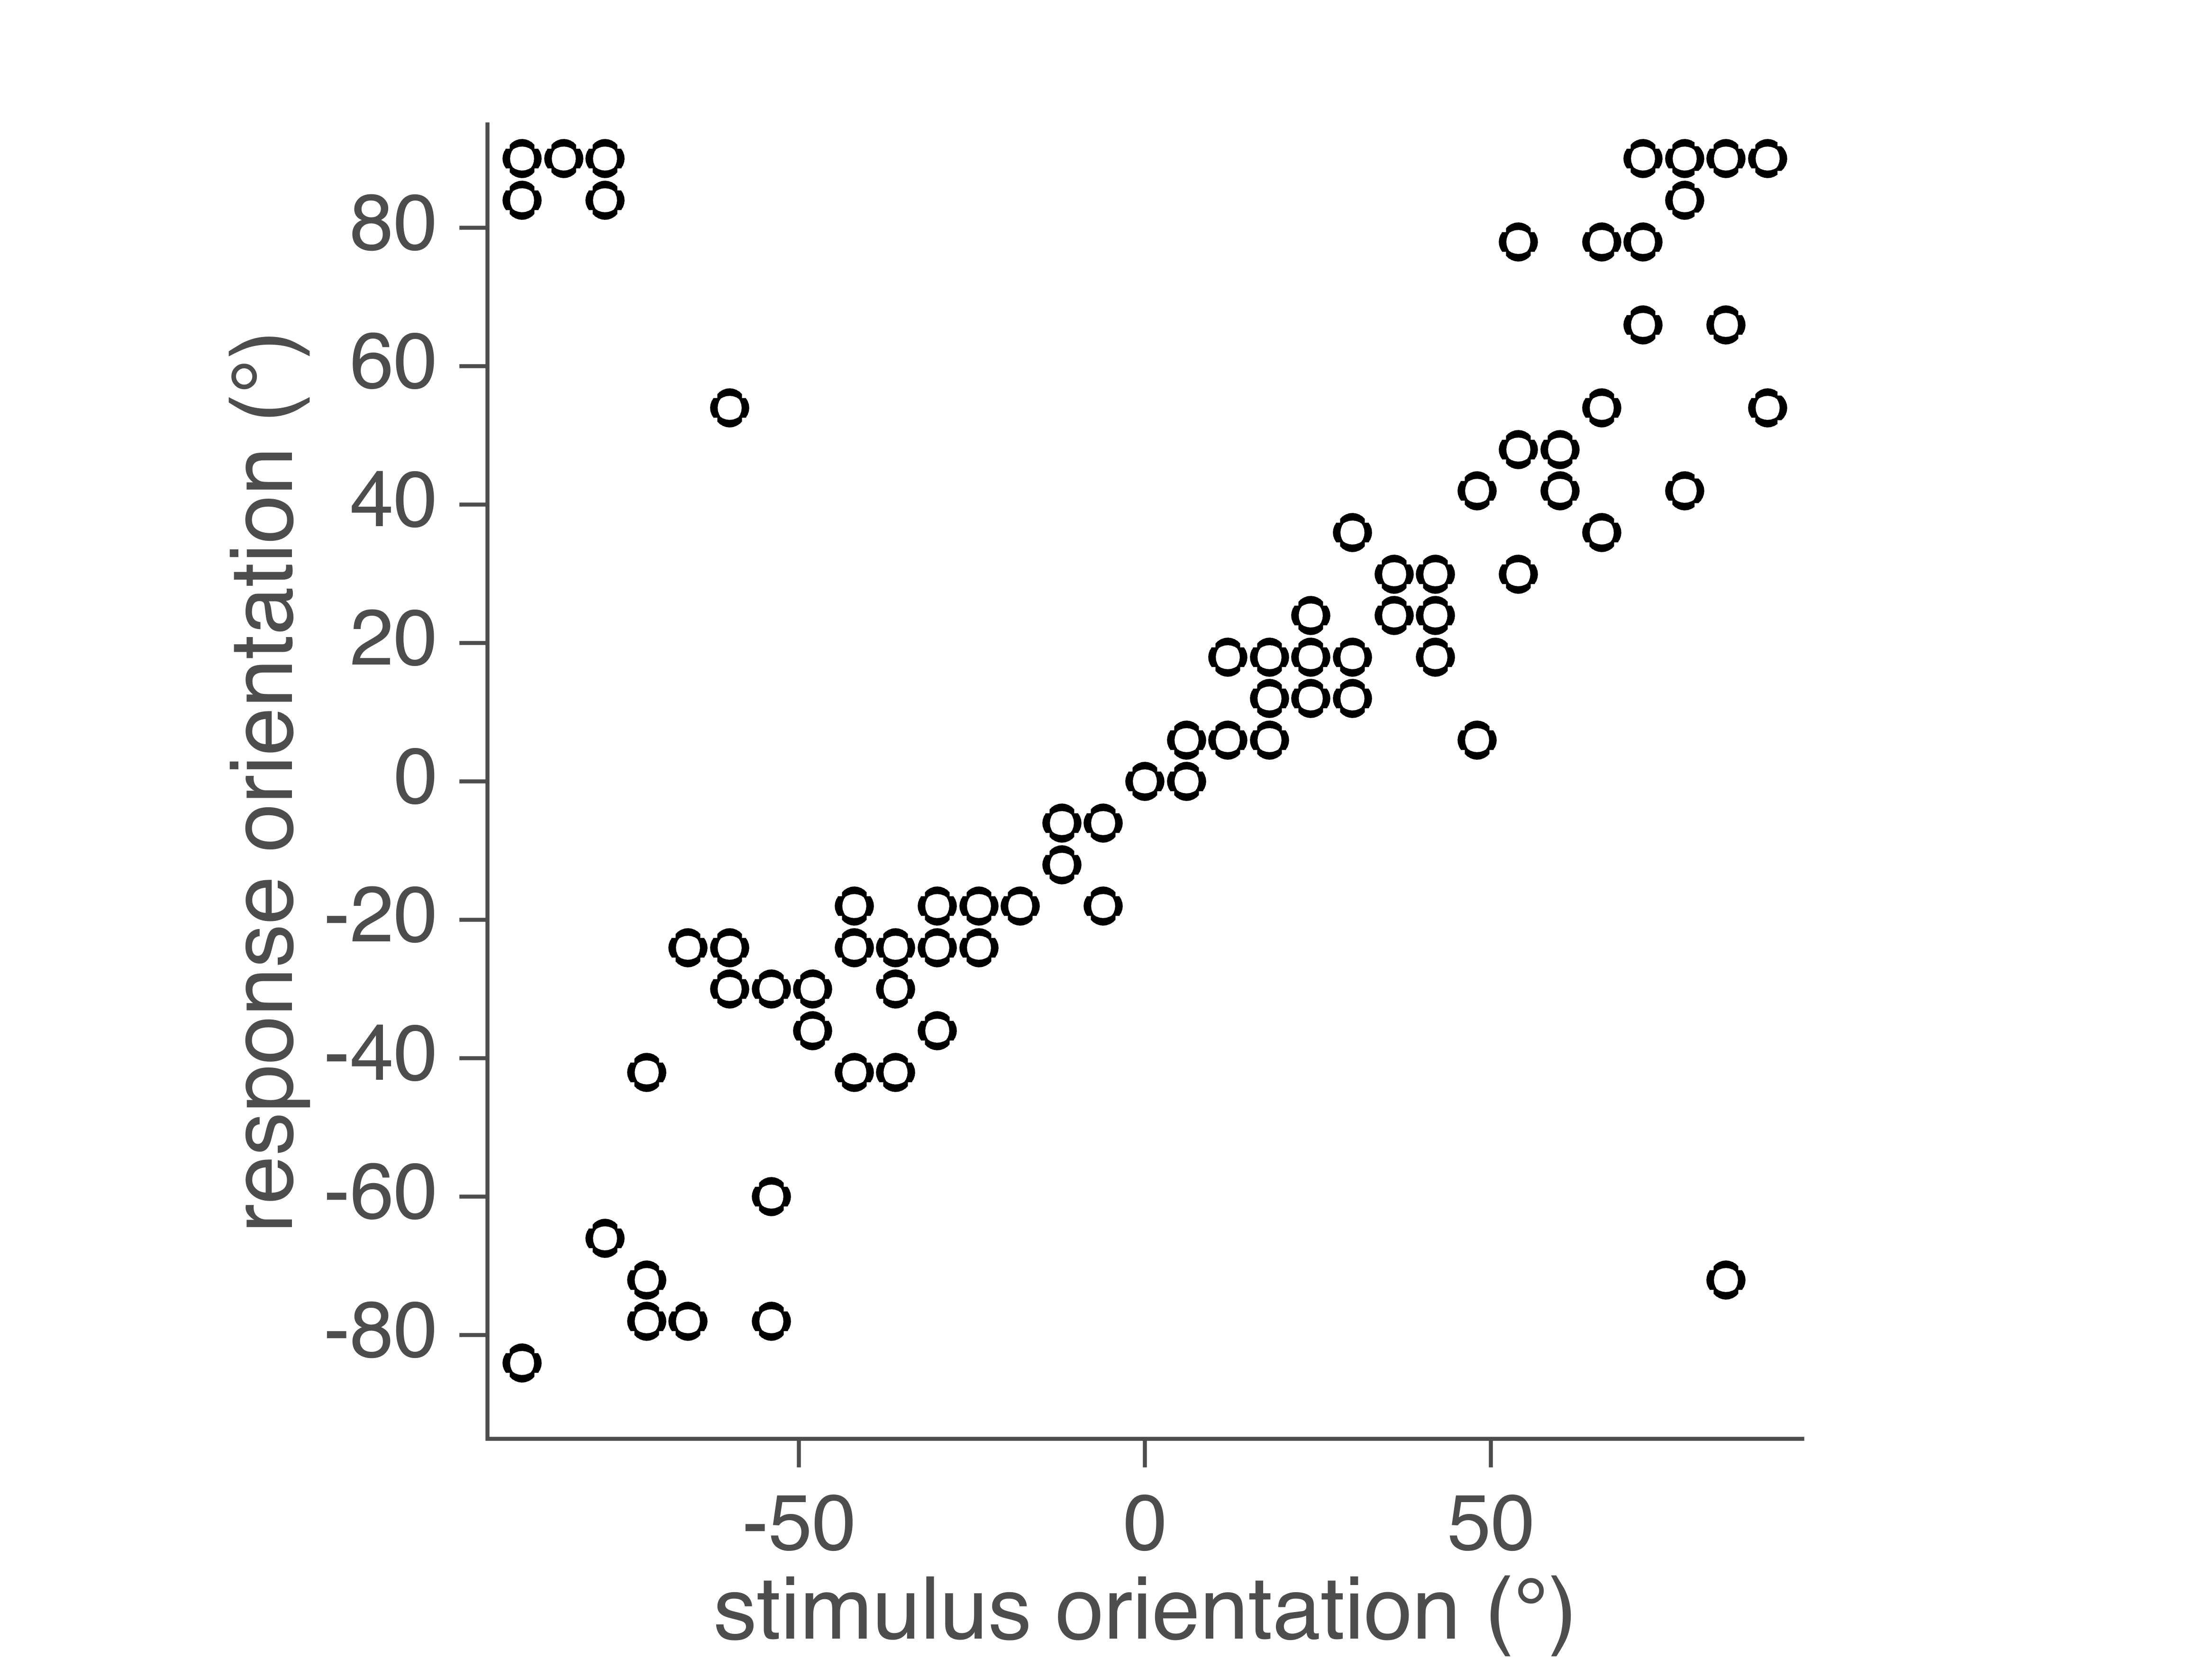

In [6]:
y = T.response/15*90; % response orientation
x = T.stimulus/15*90; % stimulus  orientation

% Build this up: first just plot, and discuss what would make this figure
% better
figure(2);
clf; % clear figure
plot(x,y,'ko','MarkerFaceColor','w','Markersize',8,'LineWidth',2);
xlabel(['stimulus orientation (' char(176) ')']);
ylabel(['response orientation (' char(176) ')']);
% set(gca,'FontSize',20);
% set(gca,'Xtick',-90:30:90,'Ytick',-90:30:90);
xlim([-95 95]);
ylim([-95 95]);
% axis square;
% box off;
nicegraph; % does some nice graphing stuff, like axis square, box off, etc



Next we see some cyclical errors. To solve for this we change from deg to radians, and then unwrap the data.



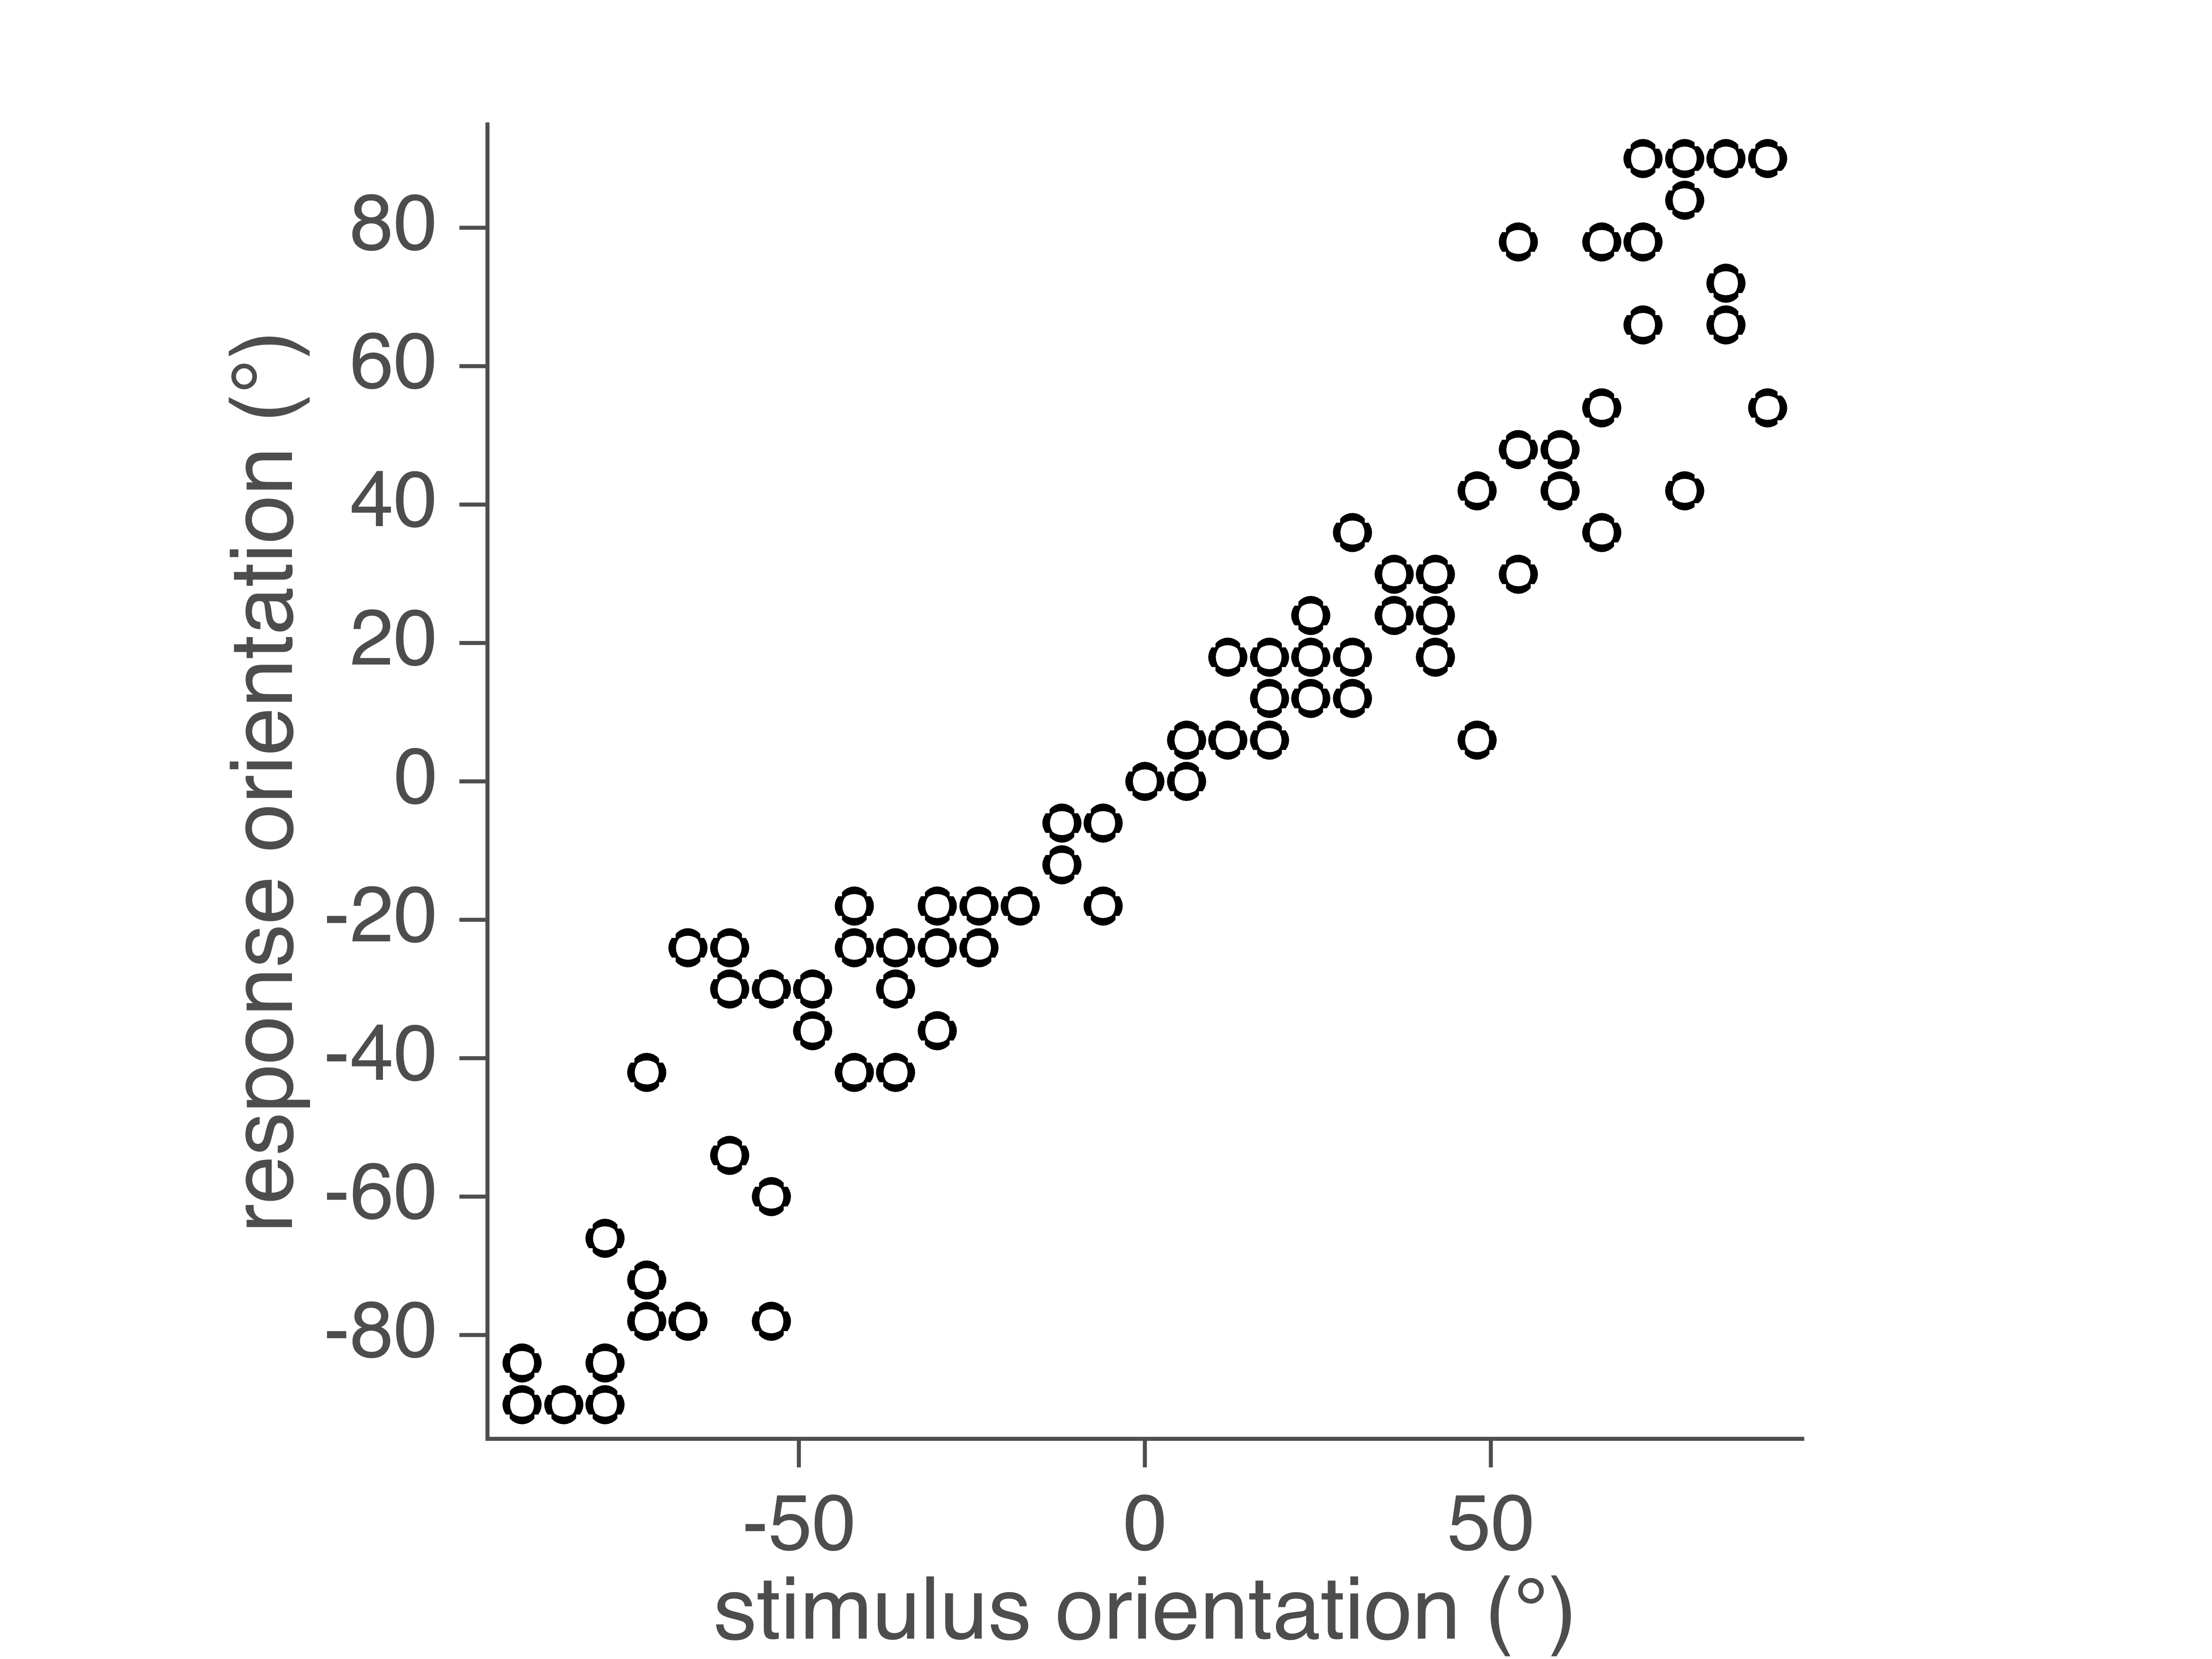

In [7]:
s = T.stimulus;
r = T.response;
s        = deg2rad(clockmin2deg(s));
r        = deg2rad(clockmin2deg(r));
sel        = abs(r-s)>0.5*pi;
r(sel)    = -r(sel);
x        = rad2deg(s);
y        = rad2deg(r);

figure(3);
clf; % clear figure
plot(x,y,'ko','MarkerFaceColor','w','Markersize',8,'LineWidth',2);
xlabel(['stimulus orientation (' char(176) ')']);
ylabel(['response orientation (' char(176) ')']);
% set(gca,'FontSize',20);
% set(gca,'Xtick',-90:30:90,'Ytick',-90:30:90);
xlim([-95 95]);
ylim([-95 95]);
% axis square;
% box off;
nicegraph; % does some nice graphing stuff, like axis square, box off, etc

In [8]:

function y = clockmin2deg(x)
y = x/60*360;
end


## Doing Frequentist linear regression

Data seem to follow a straight line (perhaps a little curve). Let's try to fit a straight line.



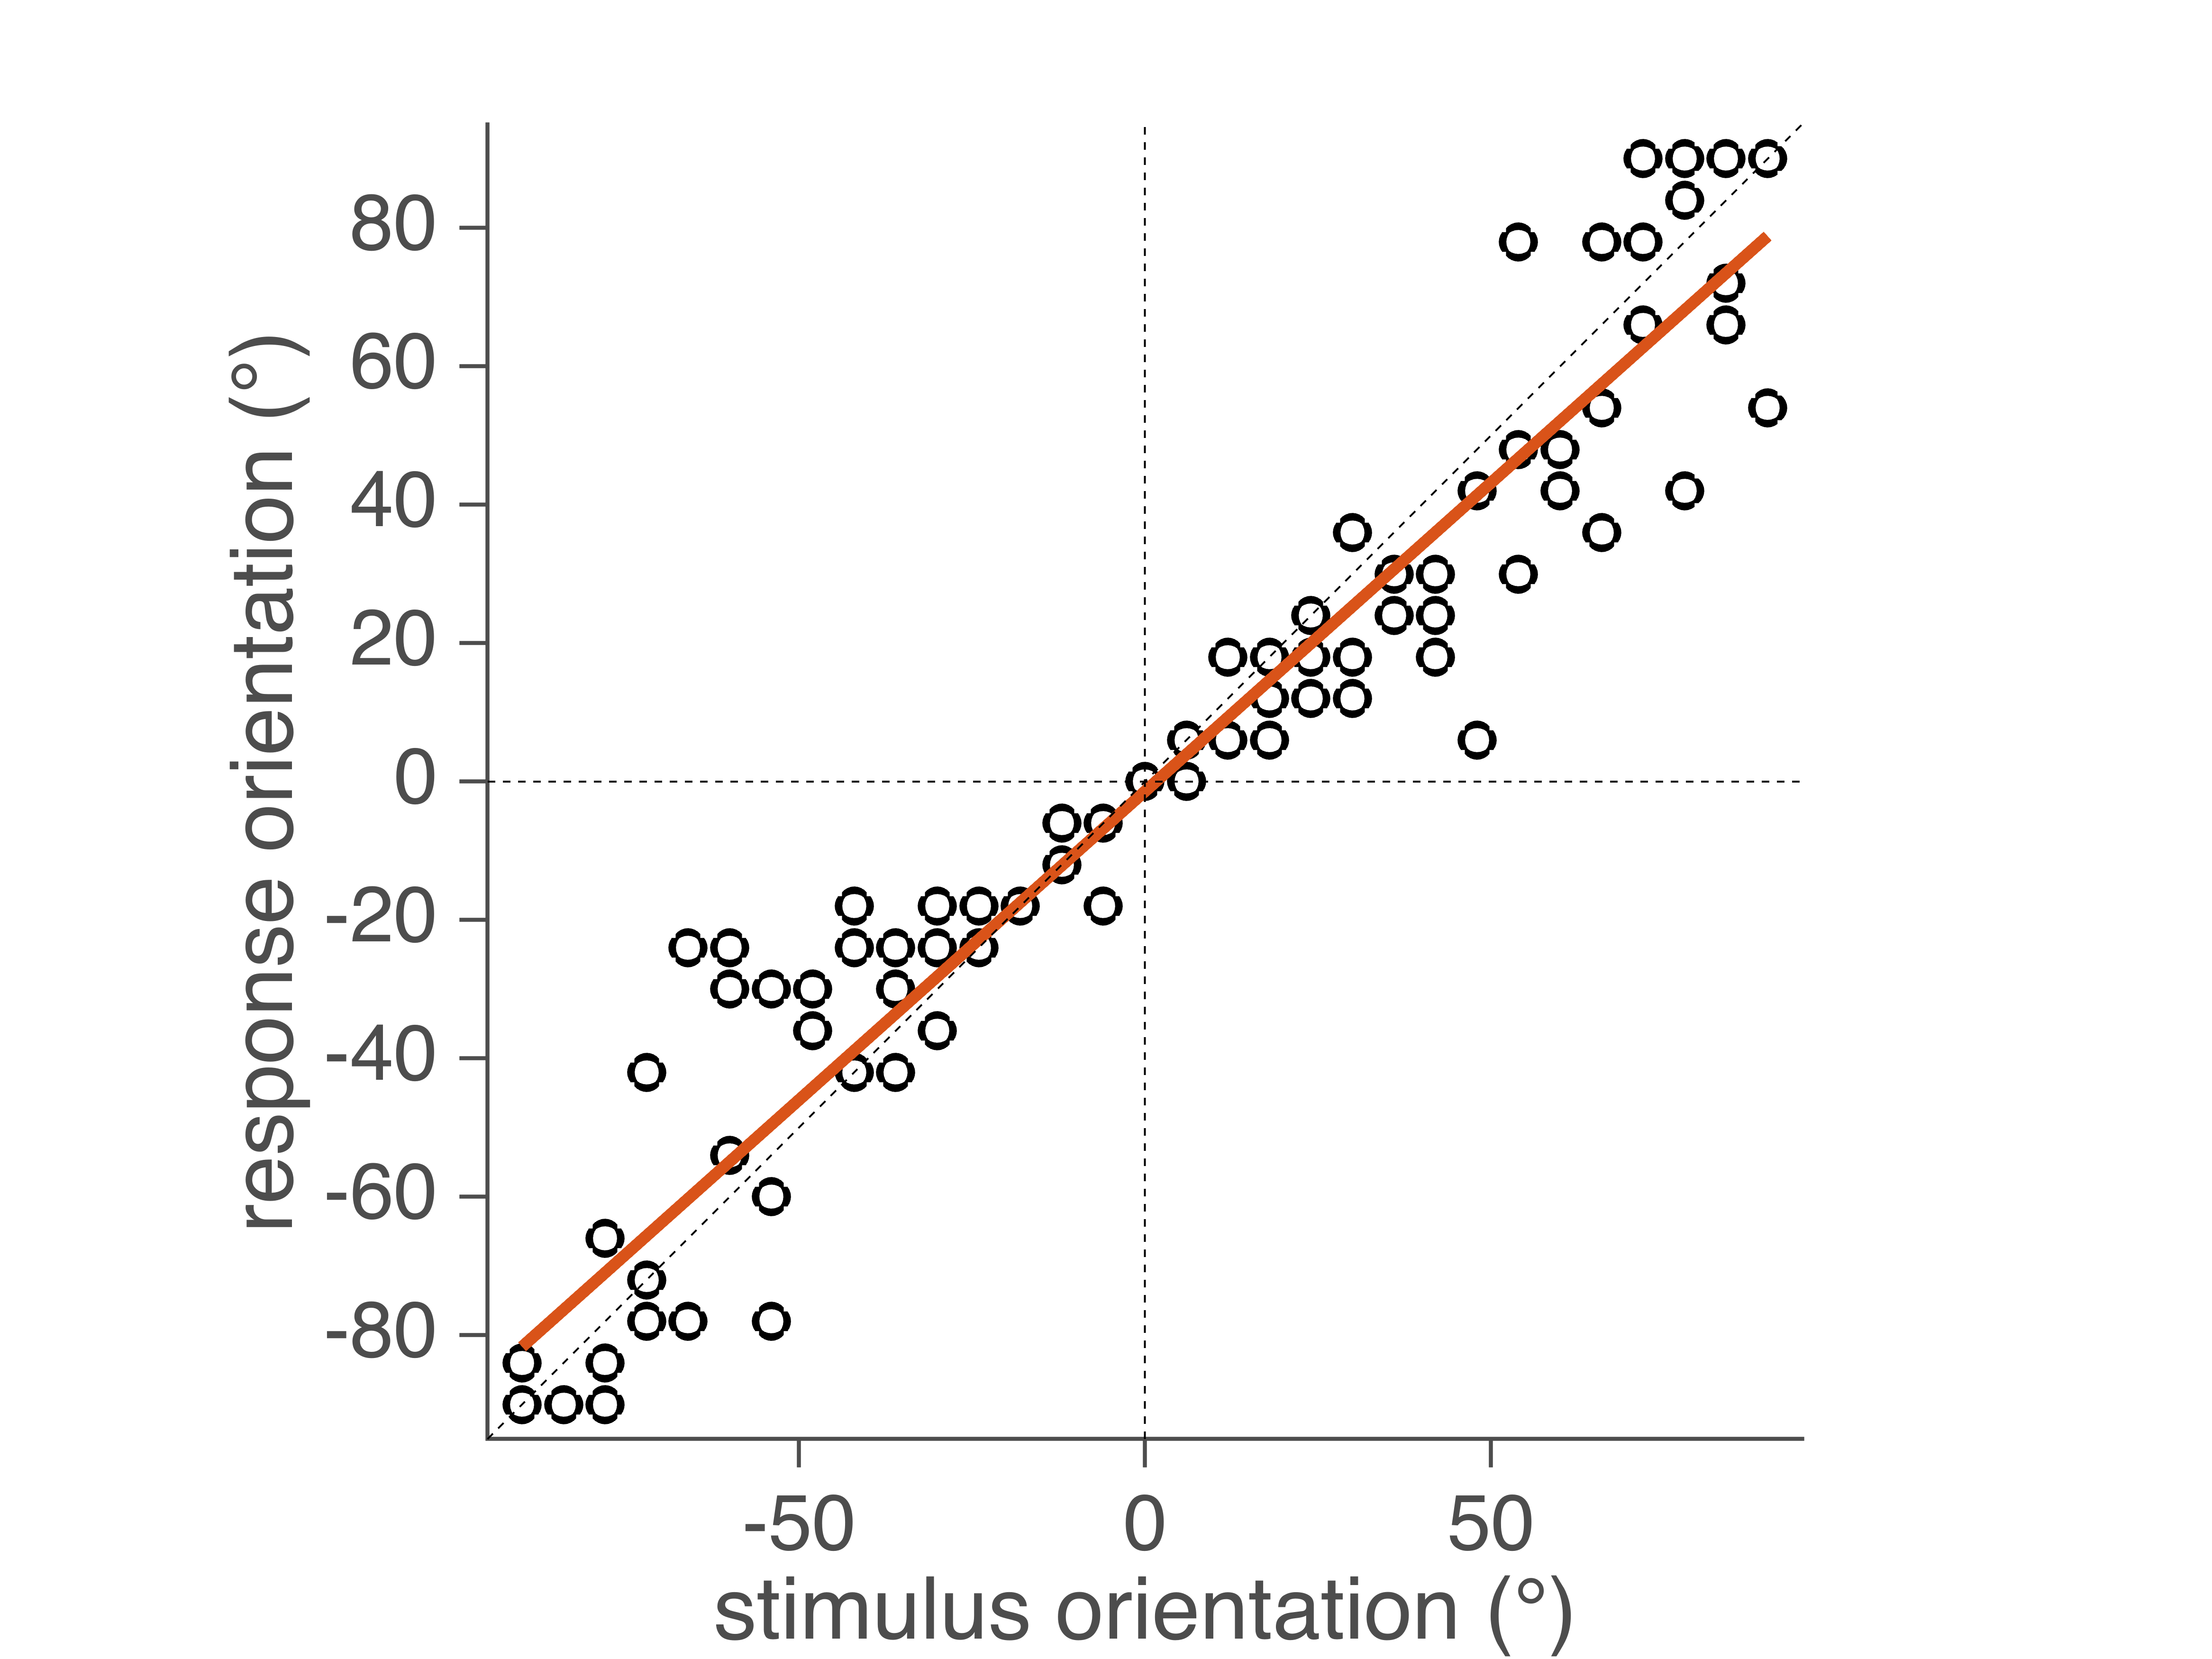

In [9]:
stats    = regstats(y,x,'linear',{'beta'}); % linear regression, obtain only regression coefficients
beta    = stats.beta; % beta(1) = offset, beta(2) = slope
% what do these parameters mean? Are they meaningful?
% And continue with 'prediction'
xi        = -90:90;
ypred    = beta(2)*xi+beta(1);

figure(3)
hold on;
plot(xi,ypred,'-','LineWidth',3);
unityline;
horline;
verline;


## Doing Bayesian analysis

Show that Bayesian analysis produces the same point estmate but does not produce a single number, it produces a distribution


In [10]:
mcmc = regjags(y,x);

Running JAGS...


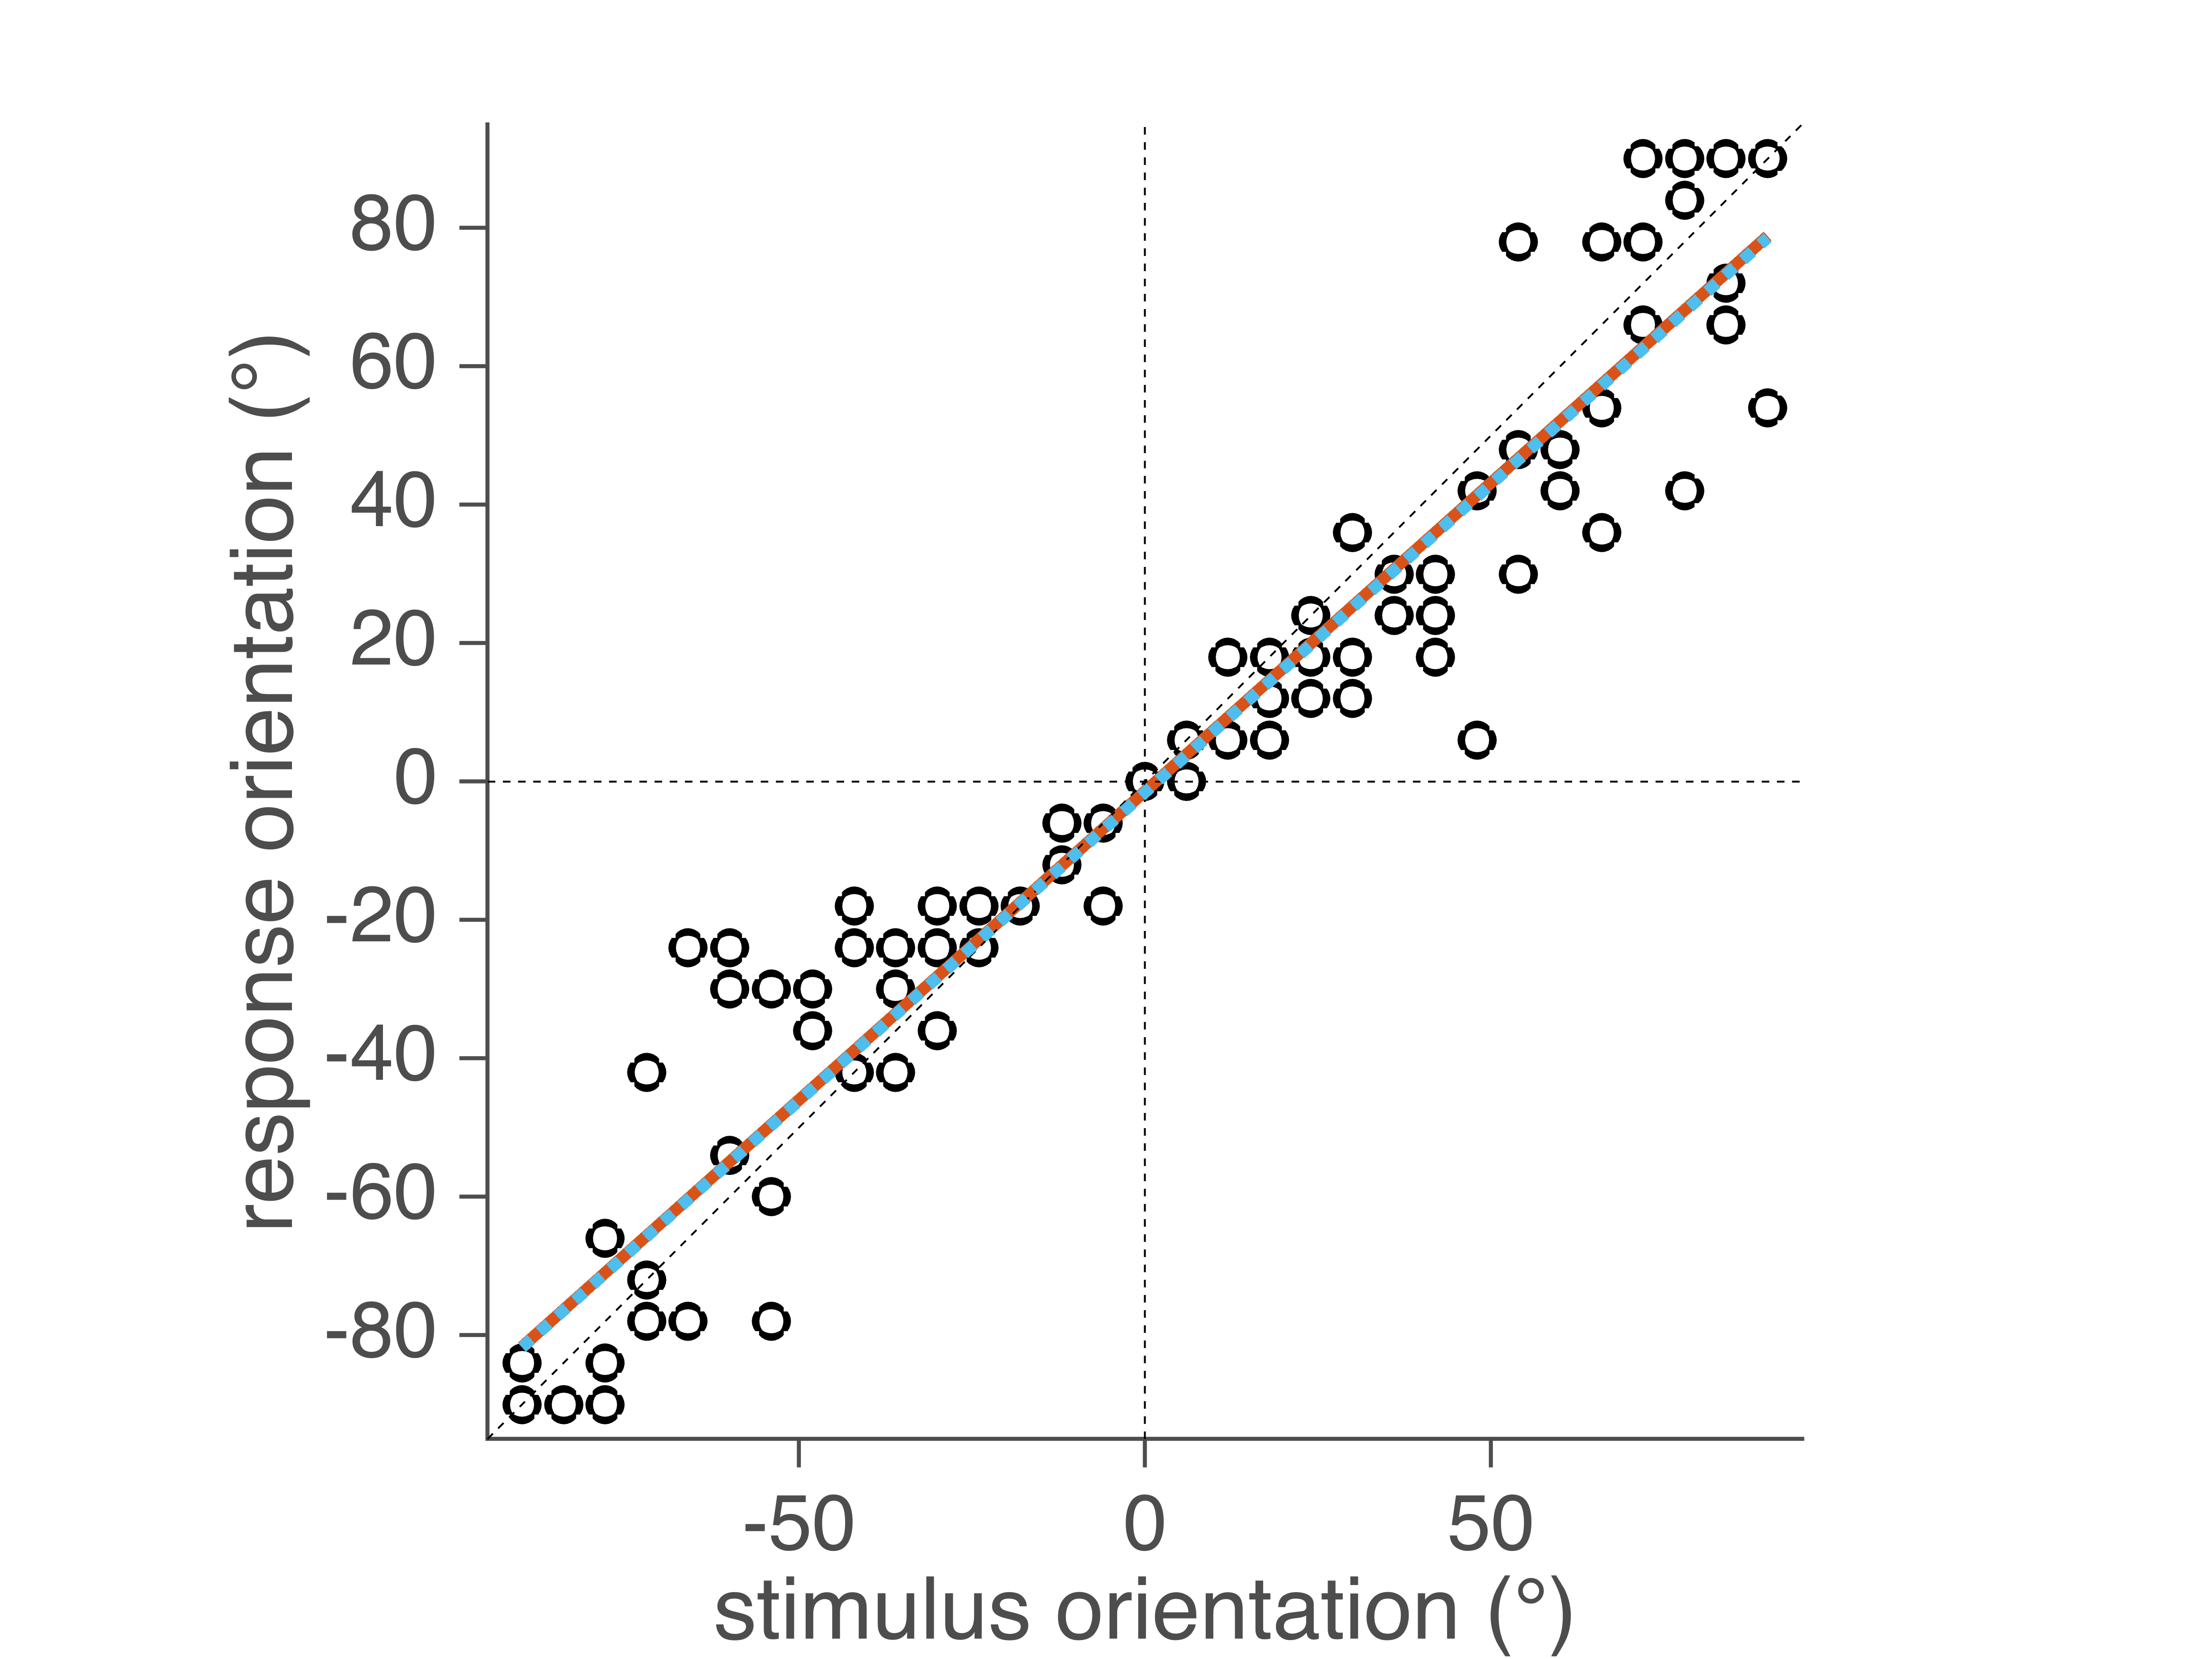

In [11]:

betamcmc = [mean(mcmc.beta0) mean(mcmc.beta1)]';
% beta
xi        = -90:90;
ypred    = betamcmc(2)*xi+betamcmc(1);
plot(xi,ypred,':','LineWidth',3);


What do we learn from this:


Bayes does exactly the same as Frequentist...


but it takes longer...


Next chapter we will see why it is still better.


Quick preview:



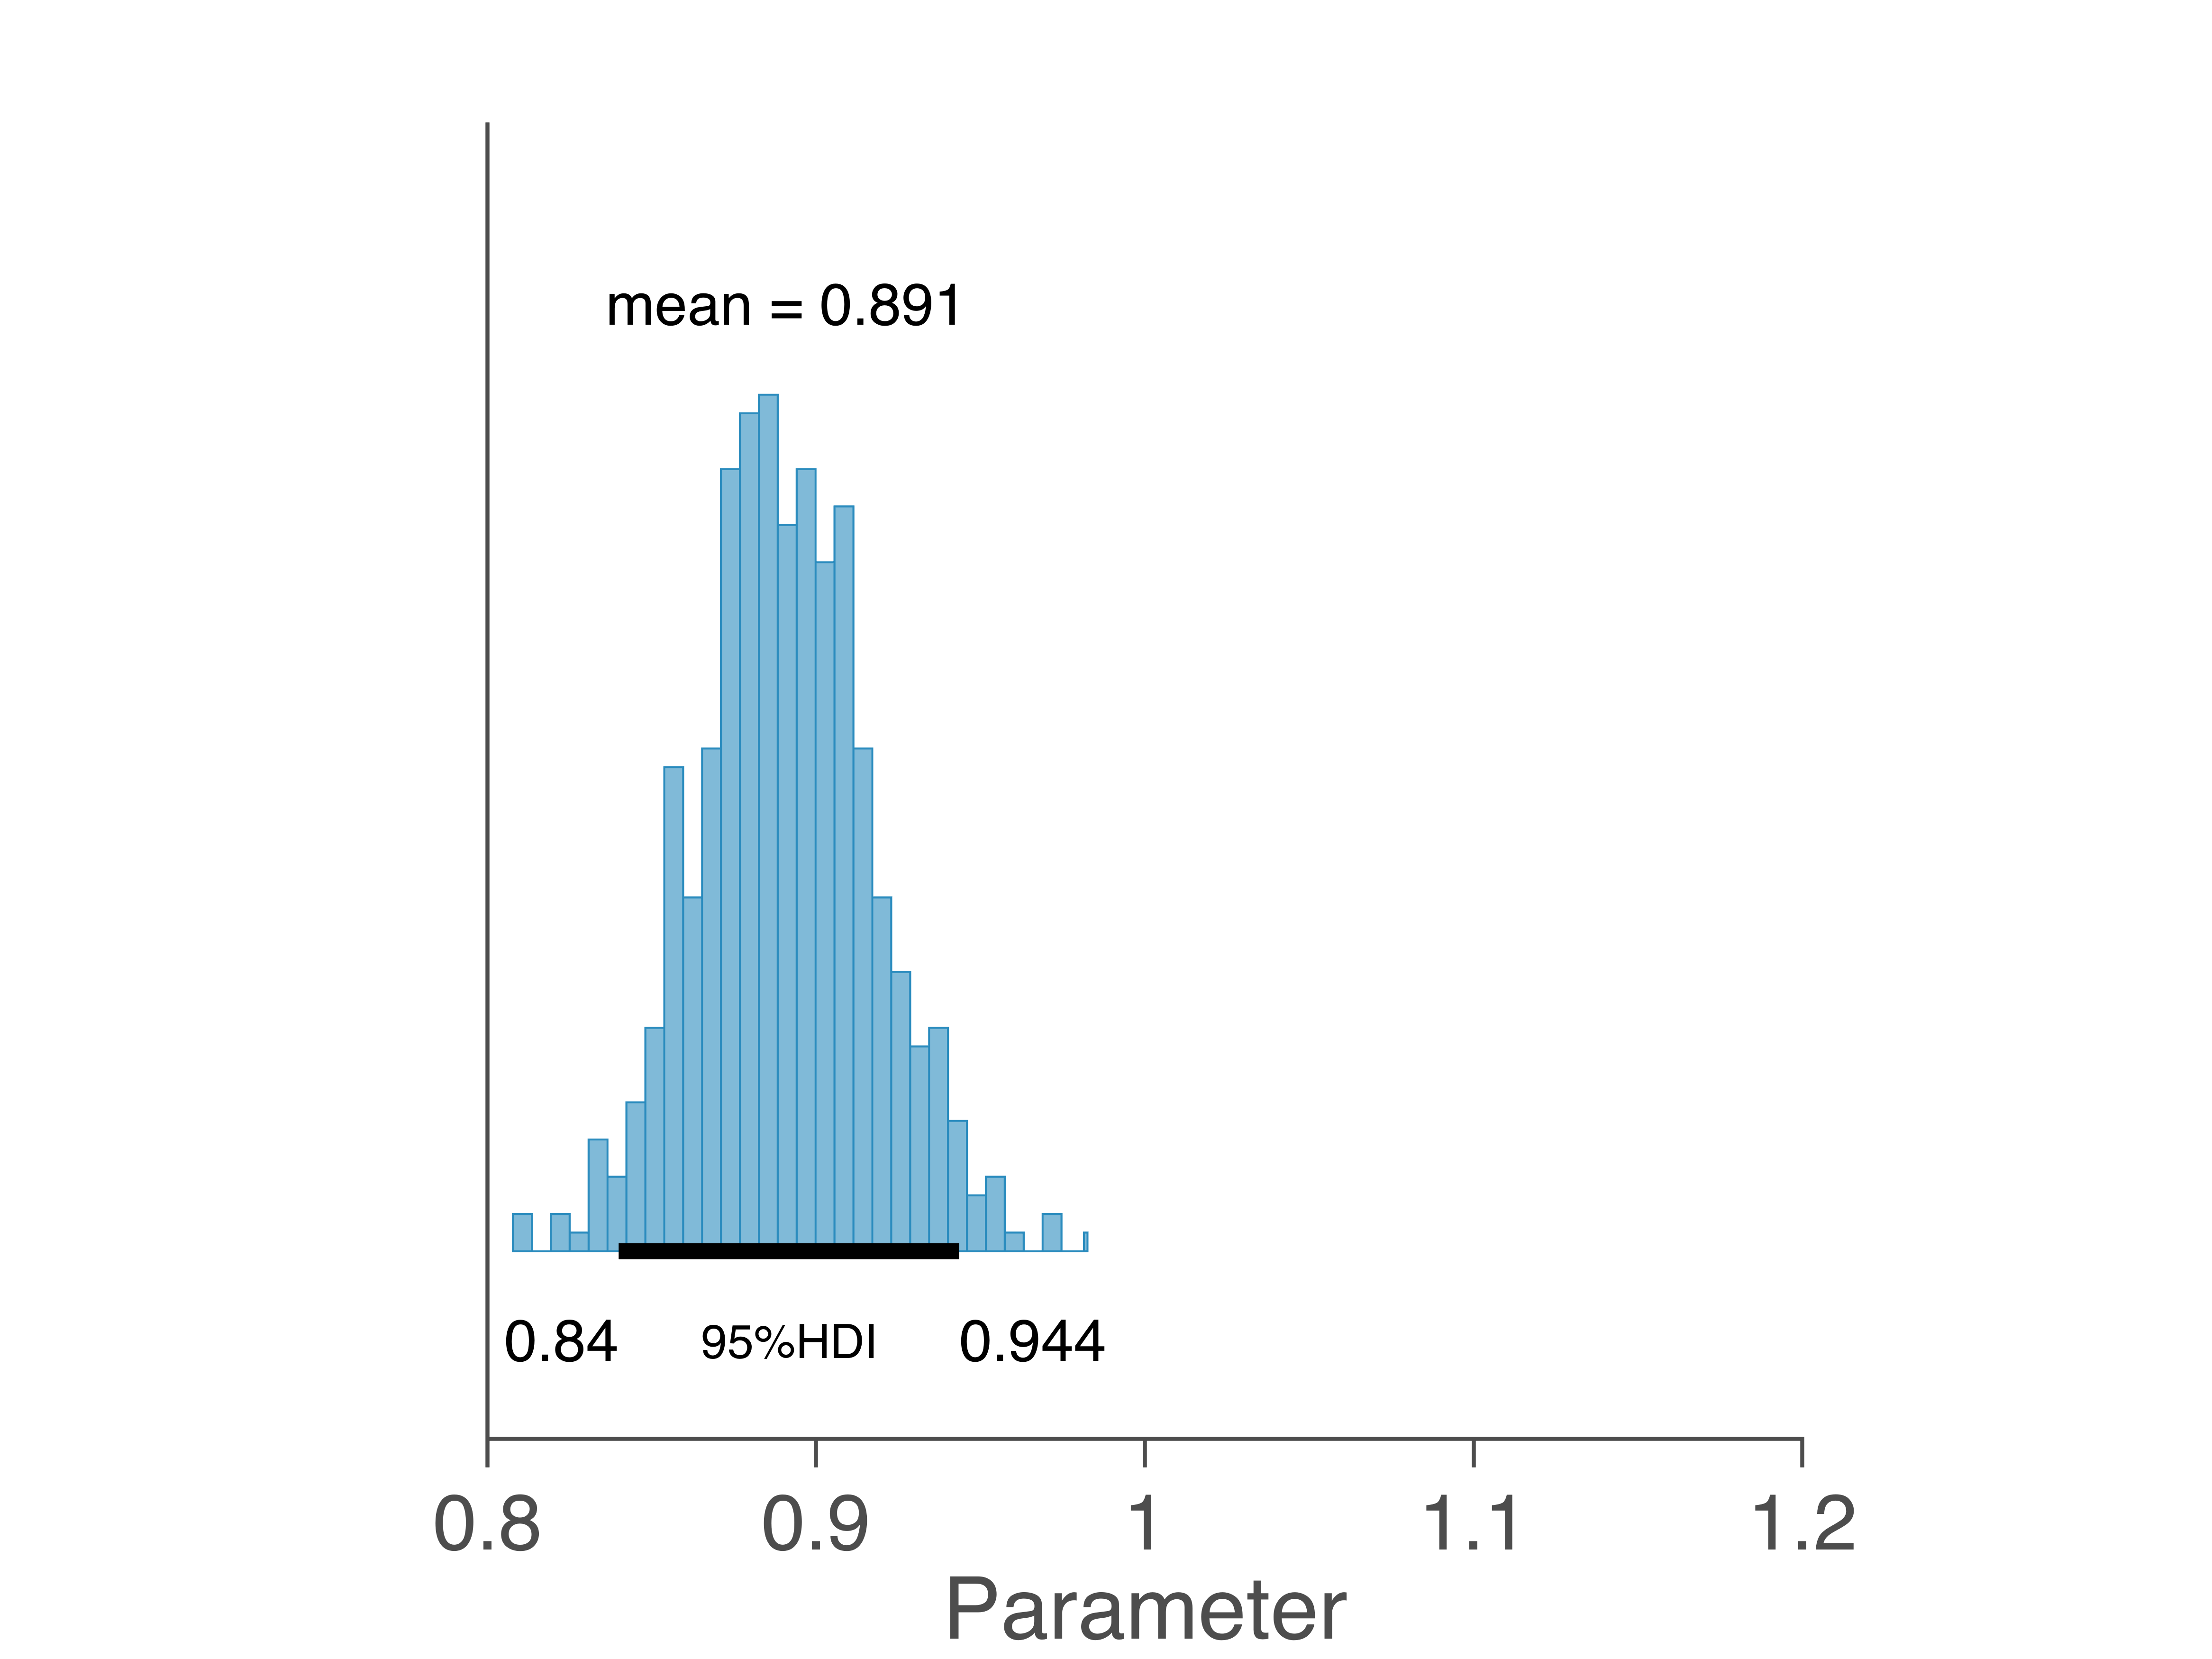

In [12]:

figure(42)
clf
plotpost(mcmc.beta1,'xlim',[0.8 1.2]);
nicegraph;
verline(beta(2))